<a href="https://colab.research.google.com/github/shitote/dist-repo/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision/"

# 🐱‍👤 The end to end Multi-class Dog Breed Classification
This notebook builds an end to end mati-class image classification using Tensorflow an TenwerFlow Hub.
## 1. Problem.
Identify the breed of a dog given an image of a dog.
This will kinder help me to identify all types of dogs that are in Kenya.
## 2. Data
The data that I am using is from Kaggle's dog Breed prediction competion.
## 3. evaluation
The evaluation is a file with prediction probability for each dog breed of each test image.
## 4. Features
this is unstructured data so we use deep learning or transfer learning
*There are 120 dog breeds that means that we have 120 classes.




### Getting the workspace ready
* Import Tensorflow 2.11.0 ✔
* import Tnsorflow Hub ✔
* Make sure that we are using a google GPU ✔

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print('TF version: ', tf.__version__)
print('TF hub version: ',  hub.__version__)


# check the GPU availobility
print("GPU", "avaulable (okay)"
      if tf.config.list_physical_devices('GPU')
      else 'not availabel')

TF version:  2.15.0
TF hub version:  0.15.0
GPU avaulable (okay)


## Getting our data ready(turning into Tensors)
With all machine learning models, our data has to be in numerical format. So thats what we'll be doing.
First turn the images into tensors
check the labels of our data.

In [ ]:
# Check the labels of the data that we have
import pandas as pd
labels_csv = pd.read_csv('drive/MyDrive/Dog Vision/labels.csv')
labels_csv

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
len(labels_csv)

10222

<Axes: >

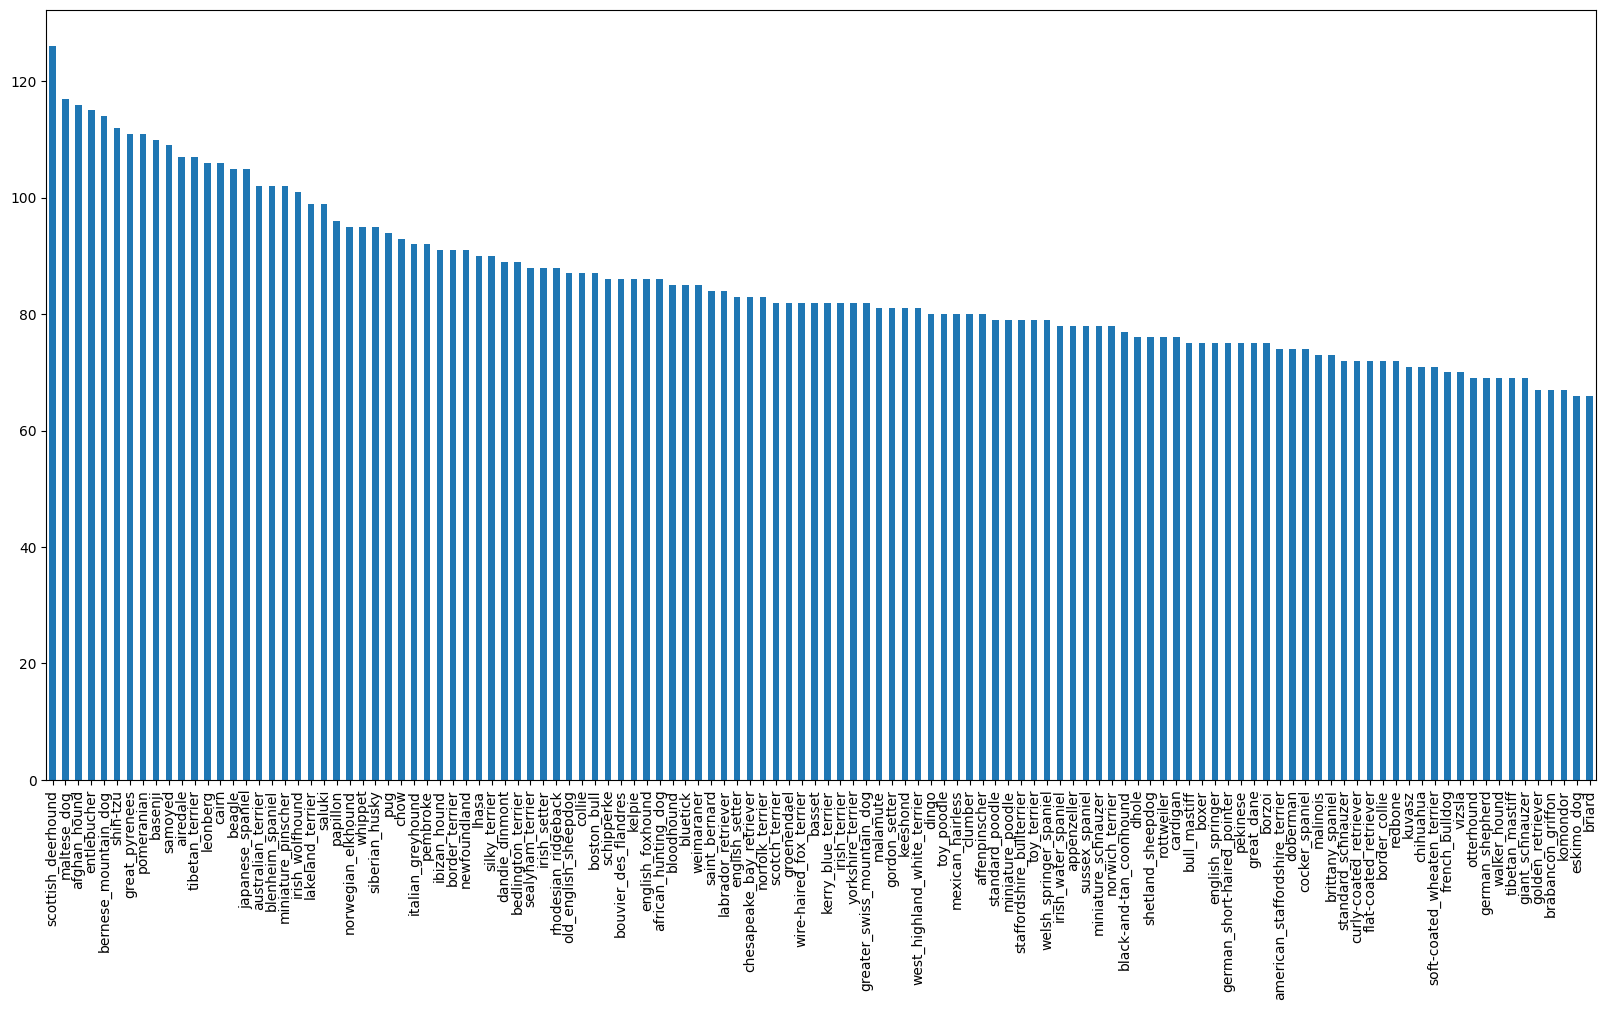

In [ ]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
# Find the median of the breed distribution
labels_csv['breed'].value_counts().median()

82.0

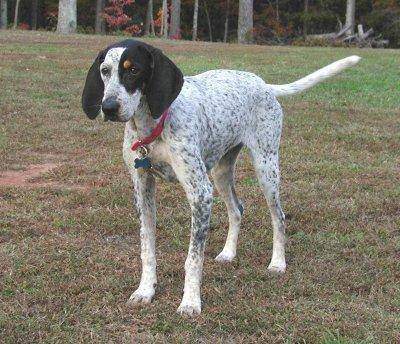

In [ ]:
# View an image.
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg")

## Geting images and their labels
lets get the list of all images file path

In [ ]:
# Creata a pathname from image ID's
filenames = []
for f in labels_csv['id']:
  filenames.append('drive/MyDrive/Dog Vision/train/'+ f + '.jpg')

filenames;

NameError: ignored

In [ ]:
import os
len(os.listdir('drive/MyDrive/Dog Vision/train/'))

10222

In [ ]:
 # check if the filenames that are created if the match the files in the actual image file
 if len(os.listdir('drive/MyDrive/Dog Vision/train/')) ==  len(filenames):
   print('The file are of the same length.')
else:
  print('They are not of the same length so you will have to go an')


The file are of the same length.


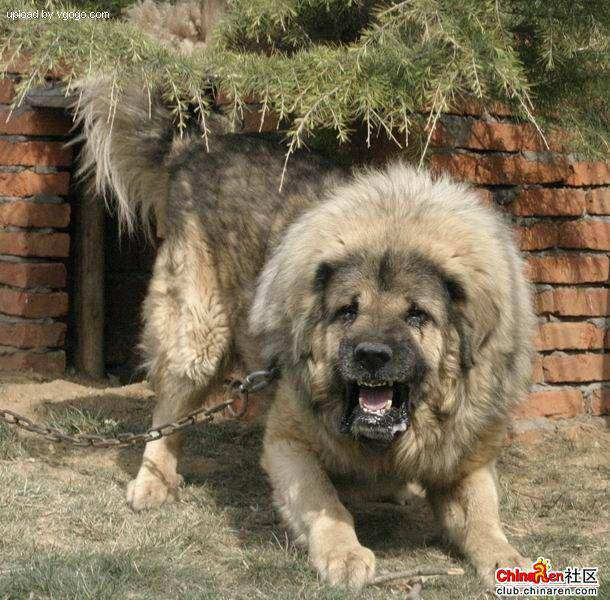

In [ ]:
# use the files created to view the images at a given index.
Image(filenames[9000])

In [ ]:
labels_csv.breed[9000]

'tibetan_mastiff'

In [ ]:
## make tha labels into a numpy array.
# the to numpy is just the same as df.to_csv() function.
import numpy as np
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# compate the number of labels to the number of filenames that we initialy created.
if len(filenames) == len(labels):
  print('Awesome this make the work even more easy')
else:
  print('This is gonna be kinda problematic')

Awesome this make the work even more easy


In [ ]:
# find the unique values in the labels that we have
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# make a single label into an array of bo0leans
print(labels[10])
labels[10] == unique_breeds

shetland_sheepdog


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
print(labels[:2])
#  boolean_labels[:2]
len(boolean_labels)

['boston_bull' 'dingo']


10222

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # oringinal label
print(np.where(unique_breeds == labels[0])) # the location in the boolean array.
print(boolean_labels[0].argmax()) # the index where the labels ocures in the array
print(boolean_labels[0].astype(int))  # this make all tha values in one and zeros

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:5]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

### Creating our own validation set
the data that we have in position has no validation set

In [ ]:
# setup the value of X and Y
X = filenames
Y = boolean_labels

In [ ]:
len(X), len(Y)

(10222, 10222)

### use samples for the training process.
This is important since the dataset contains more values and is gonna take long to train

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES =  1000 #@param {type:'slider', min:1000, max:10000, step:100}

In [ ]:
from ast import Num
# split the data into the trining and validation sets
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                    Y[:NUM_IMAGES],
                                                    test_size=0.2,
                                                    random_state=42)

# now confirm tha length of the split datasets.
len(x_train), len(x_val), len(y_train), len(y_val)

(800, 200, 800, 200)

## Preprocessing images(Turning images into numbers)

Maake a function to handle this process to avoid rewriting the same code whenever it is needed
1. take an image filepath as imput
2. Use Tensorflow to read the files and save them into a variable, `image`
3. Turn the `images` to tensors
4. Resize the `image` to be a shape of (224, 224)
5. Return the modified `images`

In [ ]:
# convert the image to numpy
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
image[:2]

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
## make our arrayed image into tensor for them to run on a GPU
# This is done by the use of tf.constant function.
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

## Preprocessing the images

In [ ]:
# define image size
IMG_SIZE = 224

def process_image(image_path, img_size=IMG_SIZE):
  """
  Takes an image path and turn the image into a Tensor.
  """
  # Read the image file
  image = tf.io.read_file(image_path)

  # Turn the image into numerical Tensor with 3 color channels(red, green, blue)
  image = tf.image.decode_jpeg(image, channels=3)

  # Convert the color into values from 0-255, to 0-1 values this is called nomalization.
  image = tf.image.convert_image_dtype(image, tf.float32)

  # we resize the image into a square
  image = tf.image.resize(image, size=(IMG_SIZE, IMG_SIZE))

  return image

In [ ]:
# # turn the image into a tensor file.
# tensor = tf.io.read_file(filenames[2])
# tensor;

In [ ]:
# # decoding the image
# tensor1 = tf.image.decode_jpeg(tensor, channels=3)
# tensor1;

In [ ]:
# # This is called nomolization.
# tensor2 = tf.image.convert_image_dtype(tensor1, tf.float32)
# tensor2;

In [ ]:
# tf.image.resize(tensor2, size=(224, 224))

## Turn our data into batches.
The reason as to why we need to make our data ito
batche is to make them fit into the memory.
so we do 32 images at a time.
we need the datga inform of tensor turples `(image, label)`

In [ ]:
# Returna tuple of tensors.
def get_image_label(image_path, label):
  """
  Take an image file path name and the associated label,
  process the image and return a tuple of (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
(process_image(X[42]), tf.constant(Y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

### Make a function to turn the data into batches

In [ ]:
BATCH_SIZE = 32

# Create a fuicntion to turn the data into batchs
def create_data_batches(X, Y = None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Create batches of data out of image (x) label (Y)pairs.
  shufles the data if it is training data but not for validation data
  Also accepts test data as input (no labels)
  """
  # if the data is a test data set, we definately dont have the label
  if test_data:
    print("Creating test batches")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # this is only file paths no labels

    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a validation dataset, we dont need to shalfle it
  elif valid_data:
    print('Create validation data batch..')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(Y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # the remaining will definately be the training dataset.
  else:
    print("Creating training data batch..")
    # Turn the labels into tf
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                              tf.constant(Y)))

    # Shaffle the pathnames and labels befor mapping images processor functrion.
    data =  data.shuffle(buffer_size=len(X))

    # Create (image, label) tuple (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Trun the training data into batches.
    data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [ ]:
# Create training and validation data batch
train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)

Creating training data batch..
Create validation data batch..


In [ ]:
# check different attributes in the data batch
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
#Create a function to images in the data batch
import matplotlib.pyplot as plt

def show_25_images(images, labels):
  """
  Display a plot of 25 images and their labels from batch.
  """
  # set up a figure
  plt.figure(figsize = (10, 10))
  # loop through 25(for displaying 25 images)
  for i in range(25):
    # Create sublpots (5, 5)
    ax = plt.subplot(5, 5, i +1)
    # DIsplay an image
    plt.imshow(images[i])
    # add the image labels as the title
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis('off')


In [ ]:
# Unbatch the data to us to plot it.
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
len(train_images), len(train_labels)

(32, 32)

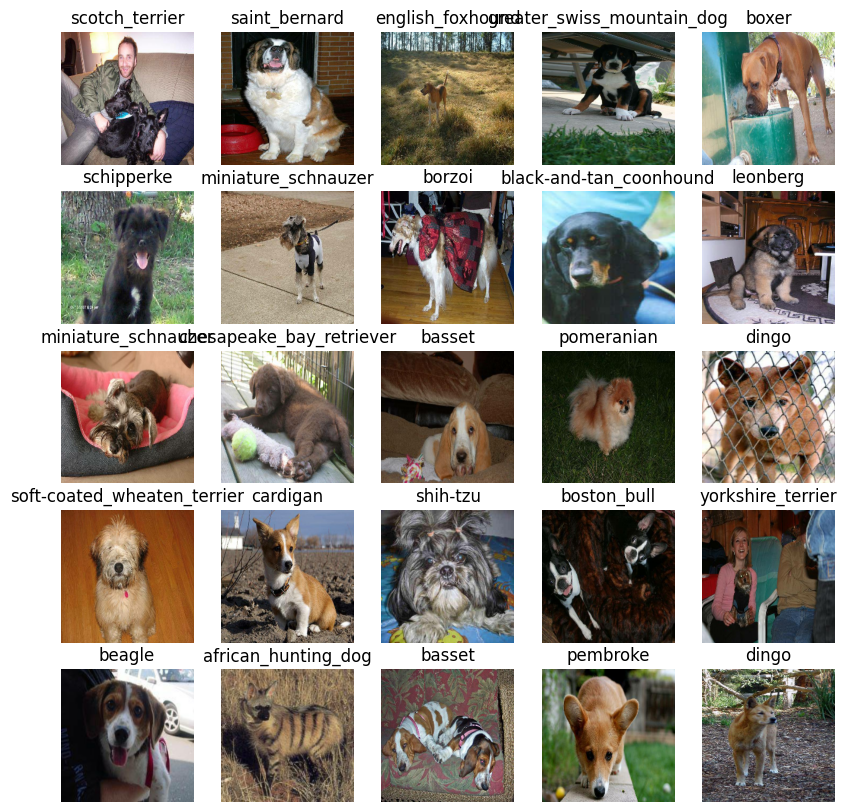

In [ ]:
show_25_images(train_images, train_labels)

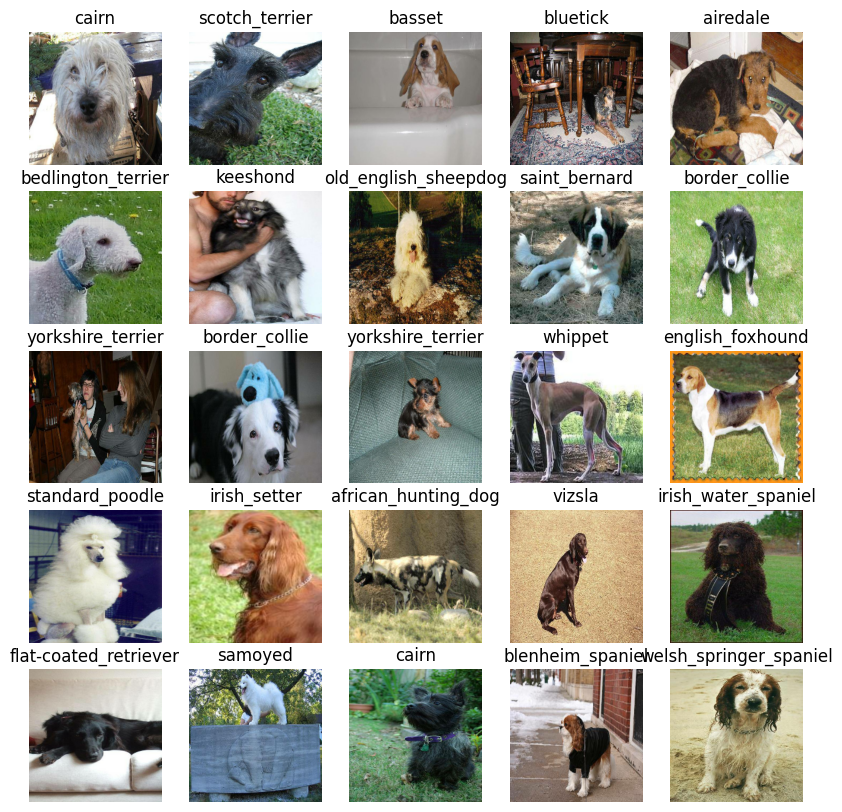

In [ ]:
# Visualize the validation set
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building the model.

Before we build the models there area afew thing that we need to define:
* The input shape(the image shape in form aof tensors) to our model.
* The output shape (image labels, in the form of tensors ) of our model.
* The url of the model that we want to use.

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]  # batch, height, width, color channels

# set output shape of our model.
OUTPUT_SHAPE = len(unique_breeds)

# setup the model url from the Tf hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_035_224/feature_vector/5"


### Use the keras deep learning model
All the staps will be contained in a function.
* Take the input shape, output shape and the model we've chosen as a parameters.
* Define the layers in keras model in sequentiao fashion.
* COmpliles the model
* Builds the model
* Return the model

resource

In [ ]:
# Create a function which builds a keras model.
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):

  # Setup the model layes.
  model = tf.keras.Sequential(
      [hub.KerasLayer(MODEL_URL),
       tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                             activation = 'softmax')])

  # compile the model.
  model.compile(
      loss=tf.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model


In [ ]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              410208    
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
Total params: 563,928
Trainable params: 153,720
Non-trainable params: 410,208
_________________________________________________________________


## Create callback fucntions.
this are helper function that the model will use to save nad chsck its progress

In [ ]:
from keras.callbacks import TensorBoard
# Load tensorBoard notebooke extention
%load_ext tensorboard

In [ ]:
import datetime

# create a function to build a tensorboard callback.
def create_tensorboard_callback():
  # Create log directory for strong Tensorboard logs
  logdir = os.path.join('drive/MyDrive/Dog Vision/logs',
                        # Make it so that logs get tracked whenever we perform experimentation.
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

  return tf.keras.callbacks.TensorBoard(logdir)

### Create an early ctoping callback.
Early stoping helps to prevent the model from over fitting wena give parameter stops imporoving


In [ ]:
# Early stoping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  patience=3)

## Training a model.

In [ ]:
NUM_EPOCHS = 100 #@param {type:'slider', min:10, max:100, steps:10}

In [ ]:
print('GPU is still running' if tf.config.list_physical_devices('GPU') else 'nop')

GPU is still running


Create the funtion to train the model.
* Create a model using create_model()
* Setup a Tensorboard callback using create_tensorboard_callback()
* Call fit() function on our model passing it the training data, validation data, number of epochs to tranin on and the callback we like to use
* Retrn the model.

In [ ]:
# Buld a function to train and return the trained version.
def train_model():
  """
  Train a given model and return the training version.
  """
  # Create a model
  model = create_model()

  # Create new Tensorboard sassion eachtime we train a model.
  tensorboard = create_tensorboard_callback()

  # Fit the model to the training data and passing it the callack created.
  model.fit(x=train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq =1,
            callbacks=[tensorboard, early_stopping])

  return model

In [ ]:
# Fit the model to the data
model = train_model()

Epoch 1/100
25/25 [==============================] - 156s 6s/step - loss: 4.7334 - accuracy: 0.0688 - val_loss: 3.9728 - val_accuracy: 0.1700
Epoch 2/100
 2/25 [=>............................] - ETA: 1s - loss: 2.9196 - accuracy: 0.4219

## check the tensorBoard logs
The tensorBoard magic function(%tensorboard) will access the logs directory we created and visualize its content

In [ ]:
%load_ext tensorboard
%tensorboard --logdir drive/MyDrive/Dog\ Vision/logs

## Making and evaluating predictions using the trained model.

In [ ]:
predictions = model.predict(val_data, verbose=1)
predictions

In [ ]:
predictions.shape

In [ ]:
np.sum(predictions[0])

In [ ]:
# make predictions probabilities.
index = 42
print(predictions[index])
print(f"Max value (Probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

In [ ]:
# trun prediction prabablity into their respective labels (easy to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities in to labels.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a prediction label based on an array of prediction probability.
pred_label = get_pred_label(predictions[81])
pred_label

In [ ]:
val_data

We need to unbatch the data to make predictions on the validation images ans then compare those predictions to the validation labels(truth ones)

In [ ]:
# Create the fuction to unbatch the batched dataset.
images_ = []
labels_ = []
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

images_[0], labels_[0]

In [ ]:
get_pred_label(labels_[0])

In [ ]:
get_pred_label(predictions[0])

In [ ]:
# functioniz the unbatchified data
def unbatchify(data):
  """
  Take a batch dataset of image and labels Tensors and return separate arrays of images and labels
  """
  images = []
  labels = []

  # loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images, labels

# Unbatchfy the validation data.
val_images, val_labels = unbatchify(val_data)
val_images[0], val_labels[0]

we have functionalized to Get
* prediction labels
* validation labels (truth labels)
* Validation images

now make tha function to make these all more visual.

we  create a function that takes in an:
* an array of predicion probabilities, an array of truth labels and an array of images and integers.
* consvert the prediction probas to a predicted label and plot the on  single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  view the ground truth pf the image
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot the image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # change the color of the title deending onif the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Change plot title to be predicted, probability of prediction and truth label
  plt.title('{} {:0.0f}% {}'.format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
            color = color)


In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels= val_labels,
          images=val_images,
          n=12)

the functions on this fuction are
* taking input of prediction probabilities array and groud thuth array and an integer
* find the prediction using get_pred_labels()
* Find top 10;
  * prediction probabilities indexes
  * prediction probability values
  * Prediction labels
* Plot top 10 prediction probality values and labels, coloring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n = 1):
  """
  Plus the top 10 highest pediction confidences along with the truth labels for sample n
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the prediction label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexas
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # find the top 10 prediction labels.
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation='vertical')

  # Change the color of the true labels
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]] # this gives the order of indexes in order

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

Visualize our prediction and evaluate the model.

In [ ]:
# Check out afew predictions and their different values.
i_multiplier = 20
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

## Save and Reloading a trained model.

In [ ]:
# Creade a function to save the model.
def save_model(model, suffix=None):
  """
  Save a model in a models directory and apped=nds a suffix (string)
  """

  # Create a model directory pathname with current time
  modeldir = os.path.join('drive/MyDrive/Dog Vision/models',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))

  model_path = modeldir + "_" + suffix + ".h5"  # save format for model
  print(f'Saving model to: {model_path}...' )
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load the trained model.
def load_model(model_path):
  """
  Load a save model from a spacific path.
  """
  print(f"L0oading the saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={'KerasLayer':hub.KerasLayer})

  return model

In [ ]:
from keras.saving.legacy import save
# Save the model that was trained on 1000 images
save_model(model, suffix='1000-images-mobilenetv2-Adam')

In [ ]:
# Load a trained model
loaded_1000_iamge_model = load_model('drive/MyDrive/Dog Vision/models/20230502-05581683007118_1000-images-mobilenetv2-Adam.h5')

In [ ]:
# Evaluat the pre-saved model.
model.evaluate(val_data)

In [ ]:
# evaluate the loaded model.
loaded_1000_iamge_model.evaluate(val_data)

## Training the model on the full data 🐶

In [ ]:
# Create a data batch with the full dataset.
full_data = create_data_batches(X, Y)

In [ ]:
full_data

In [ ]:
# Create a model for full model.
full_model = create_model()

In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                             patience=3)

In [ ]:
# fit the full model with the full data.
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model(full_model, suffix='full-image-set-mobilenetv2-Adam')

In [ ]:
# Load the full model
load_full_model = load_model('drive/MyDrive/Dog Vision/models/20230502-07021683010936_full-image-set-mobilenetv2-Adam.h5')

In [ ]:
len(X)

## Making prediction on the test data

Since our model has trainedon images in form of trensor batches, to make predictions on the test dataset, we'll have to get the test data in the same format as the training data.

Luckly we created a `create_data_batch()` function earlier.

To make prediction on the test data:
* Get the image dataset.
* Convert the filenames in to test data batch using the`create_data_batch()` and setting the test data pramateter to true.(since the test data do not have labels.
* Make a prediction array py passing the test batches to the predict() method called on our model.


In [ ]:
from tables.tests.common import test_filename
# Load test image filenames.
test_path = 'drive/MyDrive/Dog Vision/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
len(test_filenames)

In [ ]:
# Create test data batch.
test_data = create_data_batches(test_filenames, test_data=True)

In [ ]:
test_data

In [ ]:
# Make predictions on the test data using the loaded full model.
test_predictions = load_full_model.predict(test_data, verbose=1)